**Dataset:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Context:**

    "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."

**Content:**

    Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**The data set includes information about:**

    Customers who left within the last month – the column is called Churn

    Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

    Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

    Demographic info about customers – gender, age range, and if they have partners and dependents


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.shape

(7043, 21)

In [15]:
counts = df['Churn'].value_counts()
print("Non Churn % = {:.2f}".format((counts[0]/df.shape[0])*100))
print("Churn % = {:.2f}".format((counts[1]/df.shape[0])*100))

Non Churn % = 73.46
Churn % = 26.54


<AxesSubplot:xlabel='Churn', ylabel='count'>

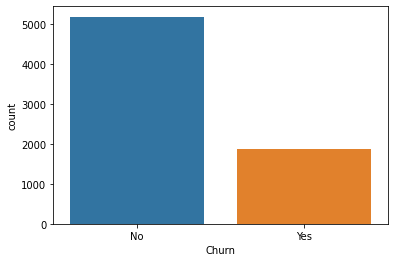

In [16]:
sns.countplot(x='Churn', data=df)

**Observation:**

    Relatively few churned customers.
    Not seriously imbalanced. Oversampling and undersampling will not be considered.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.dtypes.value_counts()

object     18
int64       2
float64     1
dtype: int64

In [28]:
# check unique values of each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [25]:
# check unique values of each column
for column in df.columns:
    print('{}:\t {} Unique Values:\t{}'.format(column, df[column].nunique(), df[column].unique()))

customerID:	 7043 Unique Values:	['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:	 2 Unique Values:	['Female' 'Male']
SeniorCitizen:	 2 Unique Values:	[0 1]
Partner:	 2 Unique Values:	['Yes' 'No']
Dependents:	 2 Unique Values:	['No' 'Yes']
tenure:	 73 Unique Values:	[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:	 2 Unique Values:	['No' 'Yes']
MultipleLines:	 3 Unique Values:	['No phone service' 'No' 'Yes']
InternetService:	 3 Unique Values:	['DSL' 'Fiber optic' 'No']
OnlineSecurity:	 3 Unique Values:	['No' 'Yes' 'No internet service']
OnlineBackup:	 3 Unique Values:	['Yes' 'No' 'No internet service']
DeviceProtection:	 3 Unique Values:	['No' 'Yes' 'No internet service']
TechSupport:	 3 Unique Values:	['No' 'Yes' 'No internet service']
StreamingTV:	 3 Uniq

**Observations:**

1. We will remove the column `customerID` as it is a unique value and not helpful for training. <br>
2. The column `TotalCharges` was wrongly detected as an object. <br>
   This column represents the total amount charged to the customer and it is, therefore, a numeric variable. <br>
   For further analysis, we need to transform this column into a numeric data type. <br>
3. `PaymentMethod` column contain `(automatic)` to couple of it's categories which is adding no special meaning to those and unnecessarily making the name long. Therefore, we remove this additional information from the entries of the PaymentMethod column.

In [31]:
# drop the customerID column from the dataset
df.drop(columns='customerID', inplace=True)

In [30]:
# transform the column TotalCharges into a numeric data type
# To do so, we can use the pd.to_numeric function. 
# By default, this function raises an exception when it sees non-numeric data; 
# however, we can use the argument errors='coerce' to skip those cases and replace them with a NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [42]:
df['TotalCharges'].dtype

dtype('float64')

In [51]:
# remove `(automatic)` from payment method names
df['PaymentMethod'].str.replace(' (automatic)', '', regex=False).unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [52]:
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [32]:
# Checking for missing values
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**Observation:**

- Column `TotalCharges` has 11 missing values.
- Need to analyze these 11 records.

In [36]:
df[df['TotalCharges'].isna()][['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


**Observations:**

    Tenure is 0 while MontlyCharges is not null and when MontlyCharges is not null TotalCharges is Nan.
    This appeared to be contradictory, therefore, we should remove these observations from the data set.

In [39]:
# drop observations with null values in TotalCharges column
df.dropna(inplace=True)

In [40]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [41]:
df.shape

(7032, 20)

In [43]:
# Checking for duplicates
df.duplicated().sum()

22

**Observation:**

    There are 22 duplicate records.
    We need to remove these duplicate records from the dataset.

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.duplicated().sum()

0